In [1]:
from sklearn.datasets import fetch_openml

In [4]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [5]:
X,y = mnist.data,mnist.target

In [7]:
X.shape

(70000, 784)

In [11]:
import matplotlib.pyplot as plt 
def plot_image(image_data,dim=(28,28)):
    image = image_data.reshape(dim)
    plt.imshow(image,cmap='binary')
    plt.axis('off')
    plt.show()

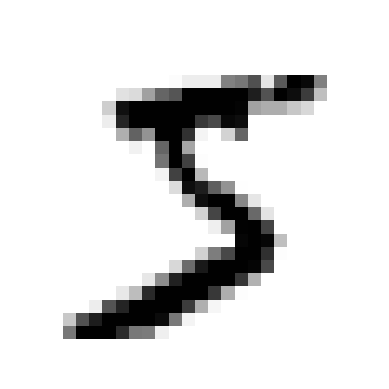

In [13]:
some_digit = X[0]
plot_image(some_digit)


In [14]:
y[0]

'5'

In [15]:
X_train , X_test , y_train,y_test = X[:60000] , X[60000:] , y[:60000],y[60000:]

In [16]:
y_train_5 = (y_train=='5')

In [17]:

y_test_5 = (y_test=='5')

In [18]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

In [20]:
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [21]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)

DummyClassifier()

In [22]:
print(any(dummy_clf.predict(X_train)))

False


In [23]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [ ]:
def customKFold(X_train,y_train,model):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone

    skfolds = StratifiedKFold(n_splits=3)

    for train_index,test_index in skfolds.split(X_train,y_train_5):
        clone_clf = clone(model)
        X_train_folds = X_train[train_index]
        y_train_folds = y_train[train_index]
        X_test_fold = X_train[test_index]
        y_test_fold = y_train[test_index]
        
        
        clone_clf.fit(X_train_folds,y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        n_correct = sum(y_pred==y_test_fold)
        print(n_correct / len(y_pred))
    
    


0.95035
0.96035
0.9604


In [26]:
from sklearn.model_selection  import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5,y_train_pred)

In [28]:
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [29]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [30]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [31]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343847

In [37]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_train_5,y_train_pred)

(array([0.09035   , 0.83708798, 1.        ]),
 array([1.        , 0.65117137, 0.        ]),
 array([False,  True]))

In [38]:
y_scores = sgd_clf.decision_function([some_digit])


In [39]:
y_scores

array([2164.22030239])

In [40]:

threshold = 0 

In [42]:
y_some_digit_pred = (y_scores>threshold)

In [44]:
threshold =3000

In [45]:
y_some_digit_pred = (y_scores>threshold)

In [46]:
y_some_digit_pred

array([False])

In [48]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=2,method='decision_function')

In [87]:
from sklearn.metrics import precision_recall_curve

precisions , recalls, thresholds = precision_recall_curve(y_train_5,y_scores)


In [92]:
def precision_recall_curve_plot(thresholds,precisions,recalls,threshold):
    import matplotlib.pyplot as plt 
    
    plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

    # extra code – this section just beautifies and saves Figure 3–5
    idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
    plt.plot(thresholds[idx], precisions[idx], "bo")
    plt.plot(thresholds[idx], recalls[idx], "go")
    plt.axis([-50000, 50000, 0, 1])
    plt.grid()
    plt.xlabel("Threshold")
    plt.legend(loc="center right")
    # save_fig("precision_recall_vs_threshold_plot")

    plt.show()

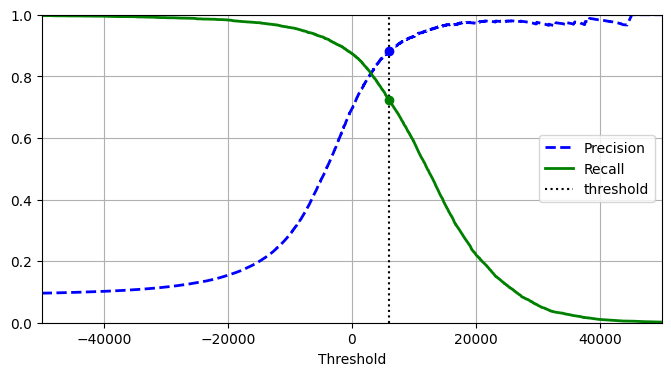

In [95]:
precision_recall_curve_plot(thresholds,precisions,recalls,6000)

In [ ]:
def precision_recall_plot(precisions,recalls,thresholds,threshold):
    import matplotlib.patches as patches  # extra code – for the curved arrow
    idx = (thresholds >= threshold).argmax()  # first index ≥ threshold

    plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

    plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

    # extra code – just beautifies and saves Figure 3–6
    plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
    plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
    plt.plot([recalls[idx]], [precisions[idx]], "ko",
            label="Point at threshold 3,000")
    plt.gca().add_patch(patches.FancyArrowPatch(
        (0.79, 0.60), (0.61, 0.78),
        connectionstyle="arc3,rad=.2",
        arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
        color="#444444"))
    plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid()
    plt.legend(loc="lower left")
    # save_fig("precision_vs_recall_plot")

    plt.show()
    

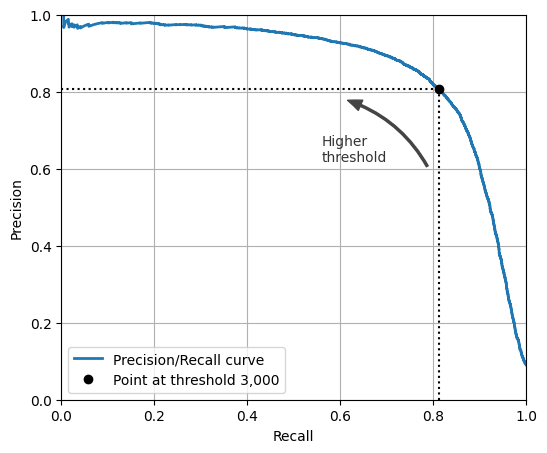

In [100]:
precision_recall_plot(precisions,recalls,thresholds,threshold)

In [123]:
idx_for_90_precision = (precisions>=0.90).argmax()

In [124]:
threshold_for_90_precision = thresholds[idx_for_90_precision]

In [125]:
threshold_for_90_precision

7277.960571395063

In [126]:
y_train_pred_90 = (y_scores>=threshold_for_90_precision)

In [127]:
precision_score(y_train_5,y_train_pred_90)

0.9000485201358563

In [128]:
recall_at_90_precision = recall_score(y_train_5,y_train_pred_90)

In [129]:

recall_at_90_precision

0.6843755764619074

In [130]:
from sklearn.metrics import roc_curve 


In [131]:
# fpr , tpr , threshold = roc_curve(y_train_5,y_scores)

In [132]:
def plot_roc_curve(threshold_for_90_precision):
    import matplotlib.patches as patches
    fpr , tpr , thresholds = roc_curve(y_train_5,y_scores)
    idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
    tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

    plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
    plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
    plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
    plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

    # extra code – just beautifies and saves Figure 3–7
    plt.gca().add_patch(patches.FancyArrowPatch(
        (0.20, 0.89), (0.07, 0.70),
        connectionstyle="arc3,rad=.4",
        arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
        color="#444444"))
    plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
    plt.xlabel('False Positive Rate (Fall-Out)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
    plt.axis([0, 1, 0, 1])
    plt.legend(loc="lower right", fontsize=13)
    # save_fig("roc_curve_plot")

    plt.show()

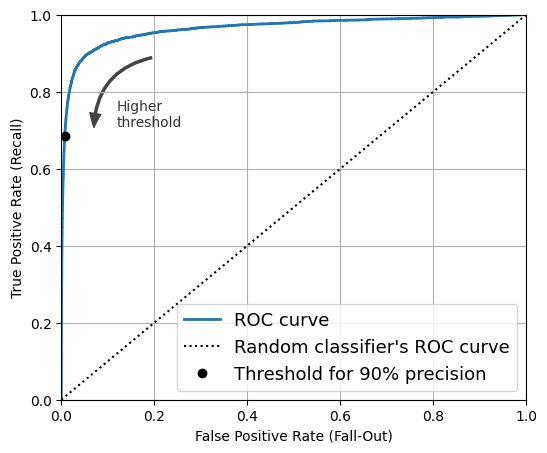

In [134]:
plot_roc_curve(threshold_for_90_precision)

In [135]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9650460216920477